# pyjeo: an open source image processing library in Python

## GEO-OPEN-HACK-2024 25/06/2024

Pieter Kempeneers, Joint Research Centre, Ispra

### Time table

| Time        | Subject                           |
|-------------|-----------------------------------|
| 09:30-09:45 | Introduction: installation and design |
| 09:45-10:00 | The Jim data model |
| 10:00-10:30 | Briding pyjeo to third party libraries|
| 10:30-10:45 | **Coffee break** |
| 10:45-11:15 | Exercise 1: parallel processing through tiling|
| 11:15-12:30 | Exercise 2: parallel processing though multi-threading|
| 12:30-13:30 | **Lunch break** |

## Installation and usage

- on your local computer
  - Linux: install from [source](https://github.com/ec-jrc/jeolib-pyjeo)
  - I Windows / Mac: via Docker ([Dockerfile](https://github.com/ec-jrc/jeolib-pyjeo/blob/master/docker/Dockerfile_deb12_pyjeo) available)
- on SURF (Easybuild and pip)

Let's start importing pyjeo

## Design

The pyjeo package is grouped in modules. A module combines a number of operations that belong together.

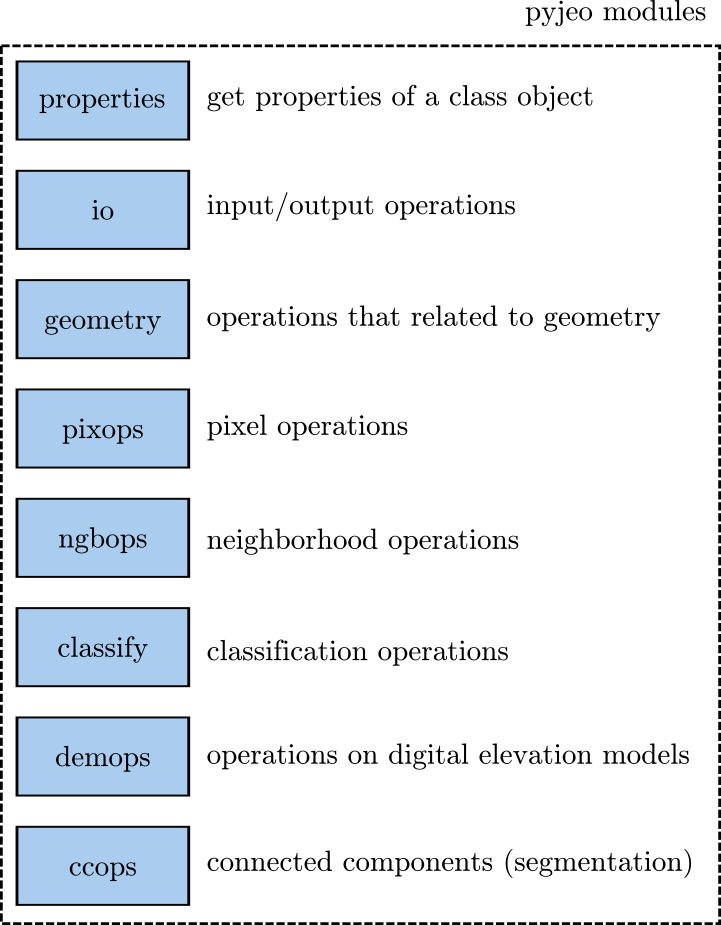

In [2]:
from IPython.display import Image
Image("../images/modules.png" , width = 400, height = 500)

## Documentation

The [documentation](https://jeodpp.jrc.ec.europa.eu/services/processing/pyjeohelp/index.html) is online (readthedocs).

Call for inline help on a module

In [ ]:
help(pj.geometry.warp)

## Jim data model

The Jim 3D data cube is a contiguous array of data in memory (x, y, z), with:

- x: columns
- y: rows
- z: planes

Bands represent different data cubes within the same Jim object.

### Single band image

In [ ]:
jim = pj.Jim('../data/example.tif')

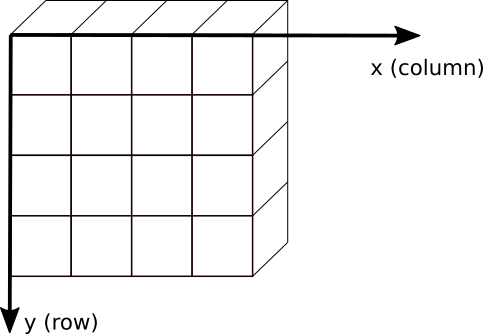

In [16]:
Image("../images/singleband.png" , width = 500, height = 500)

In [ ]:
jim.properties.nrOfCol()

In [ ]:
jim.properties.nrOfRow()

In [ ]:
jim.properties.nrOfBand()

### Multi-band image
Multi-band GeoTIFF images are read per default as multi-band images

In [ ]:
jim = pj.Jim('../data/multiband.tif')

In [ ]:
jim.properties.nrOfBand()

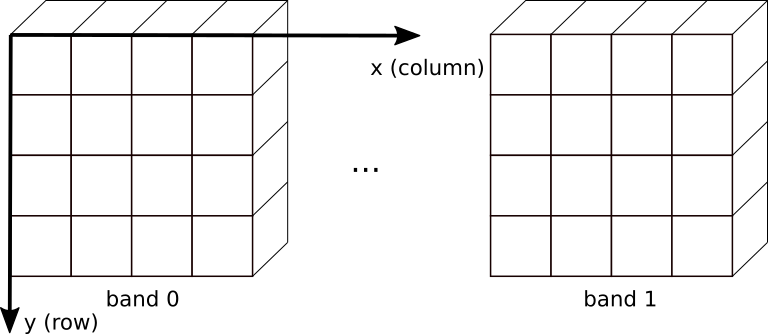

In [15]:
Image("../images/multiband.png" , width = 500, height = 500)

### Multi-plane image

Multi-band GeoTIFF images are read as 2D multi-band Jim objects as a default. To read them as 3D Jim objects, use the `band2plane` parameter.

In [ ]:
jim = pj.Jim('../data/multiband.tif', band2plane = True)

In [ ]:
jim.properties.nrOfBand()

In [ ]:
jim.properties.nrOfPlane()

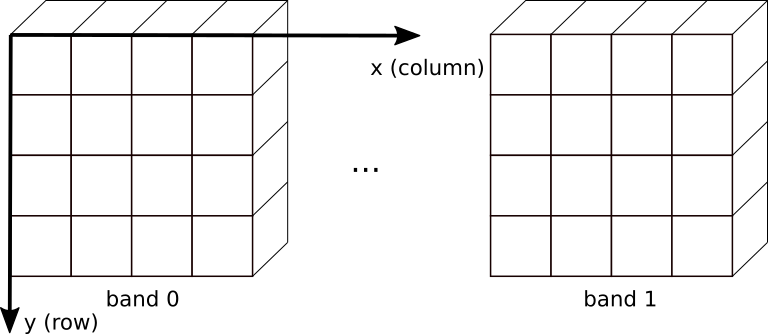

In [5]:
Image("../images/multiband.png" , width = 500, height = 500)

### Multi-plane multi-band image
Are a combination of multi-plane and multi-band. Multi-band 3D GeoTIFF images are currently not supported. We will see how to read these objects from NetCDF files next.

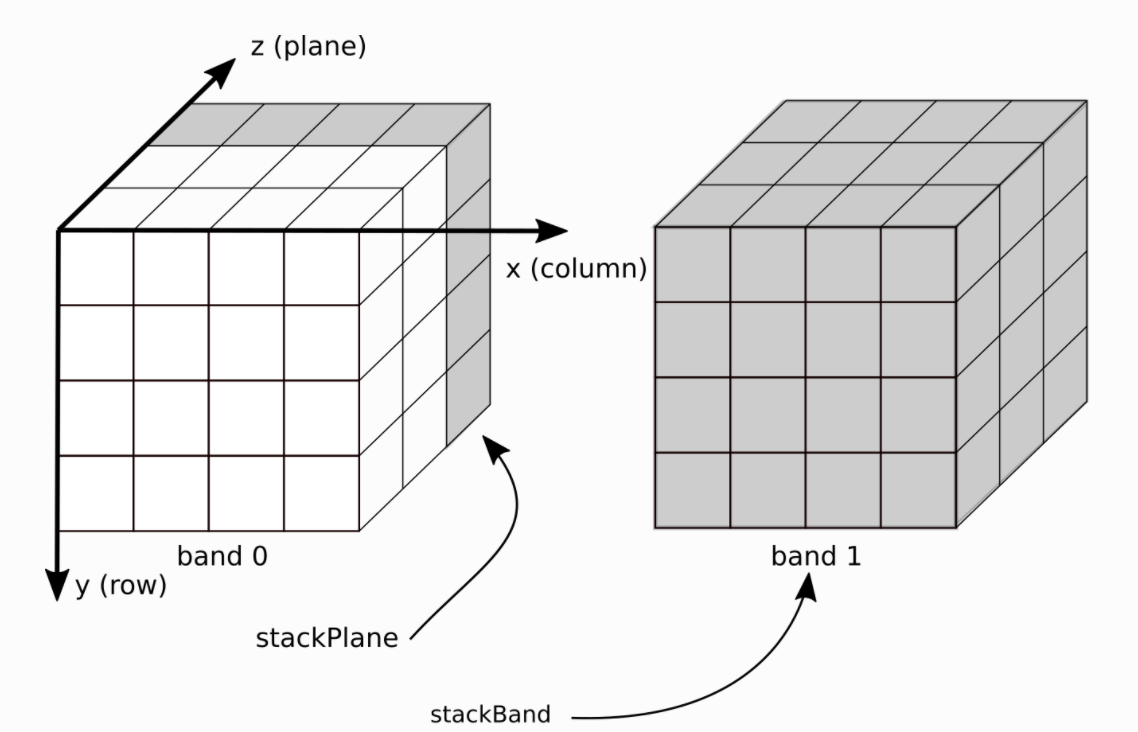

In [17]:
Image("../images/cube.png" , width = 500, height = 500)

## Bridging pyjeo to third party libraries

pyjeo Jim objects can be converted to:
  - [Numpy](https://numpy.org) array objects
  - [xarray](http://xarray.pydata.org) objects


We will use the [xarray](http://xarray.pydata.org) module to read netCDF files.

In [ ]:
import xarray as xr

In [ ]:
x = xr.load_dataset('../data/example.nc')

The xarray [Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html) provides names for its dimensions ('x', 'y', 'time') and variables ('B1', 'B2')

In [ ]:
x

In [ ]:
jim = pj.xr2jim(x)

In [ ]:
jim.properties.nrOfBand()

In [ ]:
jim.properties.nrOfPlane()

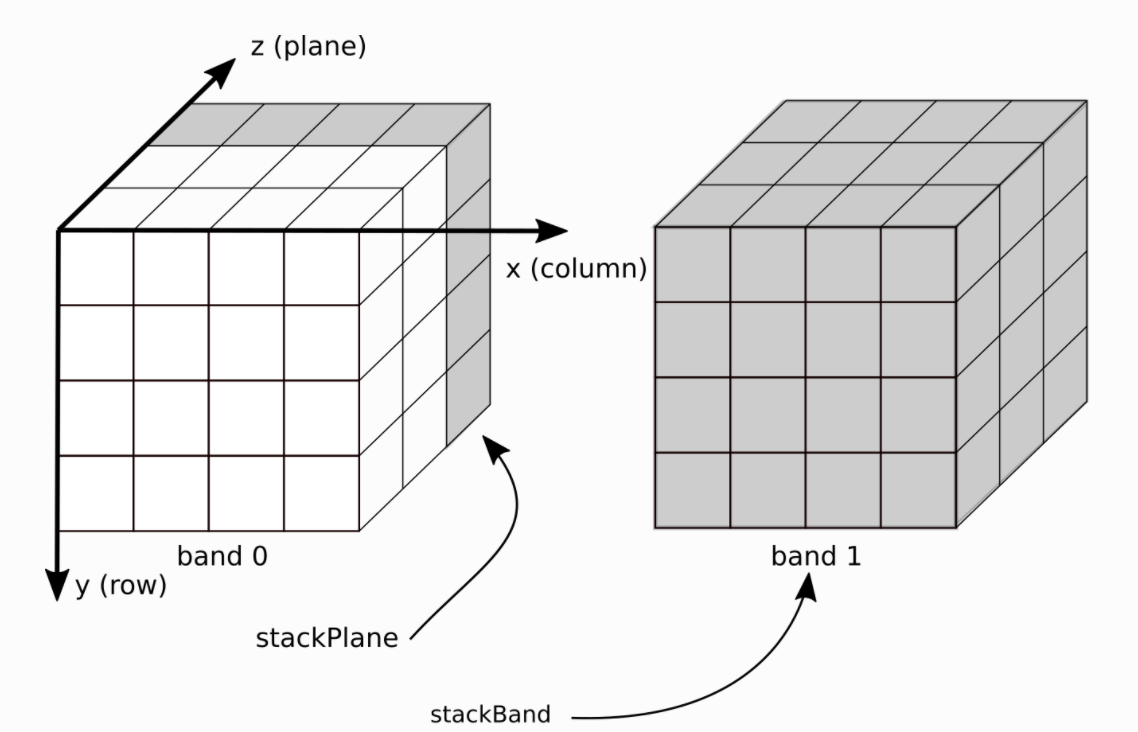

In [18]:
Image("../images/cube.png"  , width = 500, height = 500) 

The variable names for the bands and the time dimension are retained when converted to a Jim object 

In [ ]:
jim.properties.getDimension()

## Calculate NDVI (see also Exercise 1)

In [ ]:
jim.pixops.NDVI(red = 'B1', nir = 'B2', name = 'NDVI', addBand = True)

In [ ]:
jim.properties.getDimension()

### Representing the Jim object as a Xarray Dataset, DataArray, and Numpy array

`jim.xr()` -> xarray [Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html) representation of the Jim object `jim`

In [ ]:
jim.xr()

`jim.xr().B1` -> xarray [DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) for band B1 (without variable name)

In [ ]:
jim.xr().B1

`jim.xr().B1.data` -> [Numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) representation of the xarray [DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) (without meta-data for geospatial information)

In [ ]:
jim.xr().B1.data

### Numpy array representation of a Jim object (without memory copy)

In [ ]:
jim.np(band = 0)

## Access Jim elements

Load a multiband image as 3D Jim object (converting bands to planes)

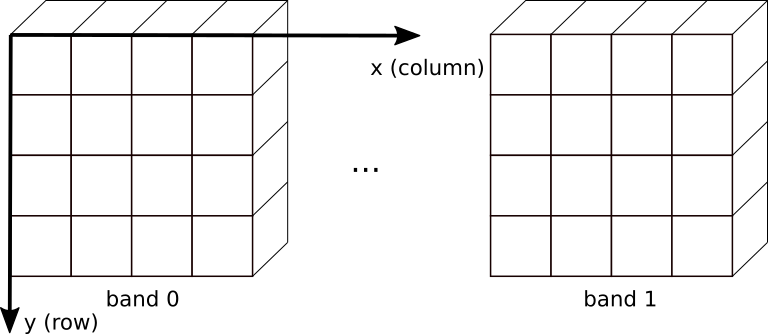

In [19]:
Image("../images/multiband.png"  , width = 500, height = 500)

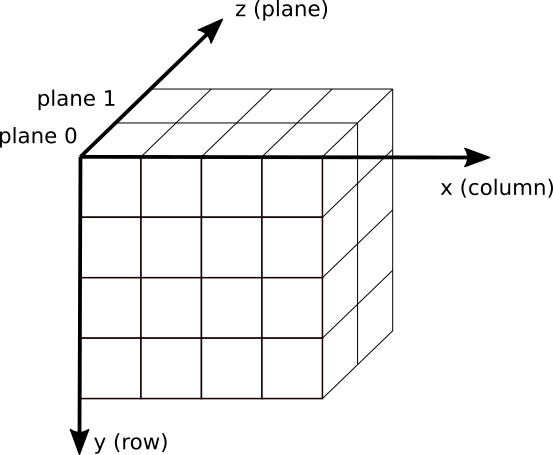

In [20]:
Image("../images/multiplane.png", width = 500, height = 500)

### Get the first plane

- The order of dimensions: plane, y, x
- Bands are not dimensions in a Jim object
- Returns a copy of the Jim object
- Indices start from 0 (the second plane has index 1)
- Colons express ranges of indices (`[0:2]` selects indices 0 and 1, `[:]` selects all indices of that dimension)
- The following code is similar to the geometry function: `pj.geometry.cropPlane(0)`

In [ ]:
jim[0,:,:]

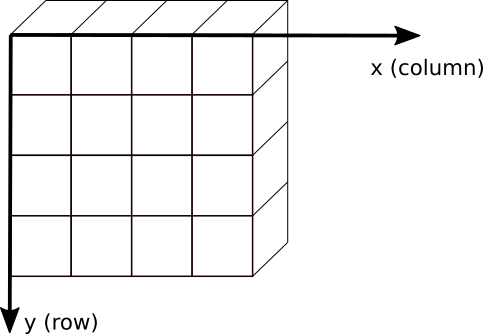

In [21]:
Image("../images/singleband.png", width = 500, height = 500)

### Exercise: get the first block of 5 x 5 pixels within the second plane

- The order of dimensions: plane, y, x
- Bands are not dimensions in a Jim object


In [ ]:
jim[1,0:5,0:5].np()

## Processing Jim objects

### Methods and Functions

#### Functions

- Functions that operate on objects must have the objects passed as arguments
- Functions leave their arguments unaltered
- A new object is returned

In [ ]:
jim = pj.Jim('../data/multiband.tif')

In [ ]:
jim.properties.nrOfBand()

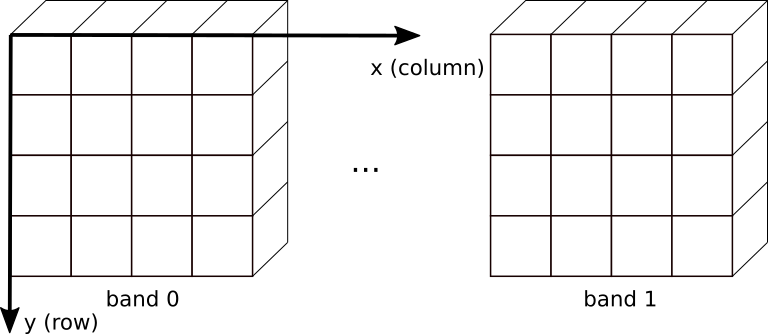

In [22]:
Image("../images/multiband.png", width = 500, height = 500)

In [ ]:
jim_cropped = pj.geometry.cropBand(jim, 0)
jim_cropped.properties.nrOfBand()

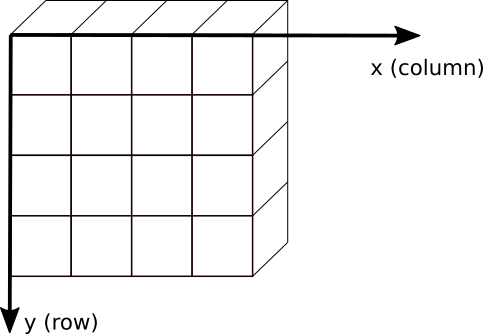

In [23]:
Image("../images/singleband.png"  , width = 500, height = 500)

In [ ]:
jim.properties.nrOfBand()

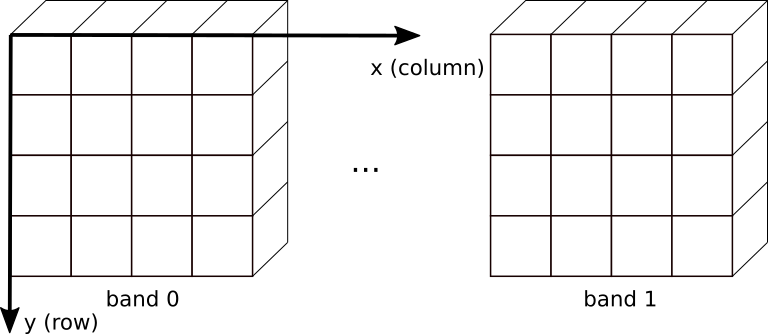

In [24]:
Image("../images/multiband.png" , width = 500, height = 500)

jim is unaltered

#### Methods

- Methods directly operate on objects, i.e., instances of a class
- Methods can change objects in-place (overwrite input)
- No(ne) object is returned

In [ ]:
jim = pj.Jim('../data/multiband.tif')

In [ ]:
jim.properties.nrOfBand()

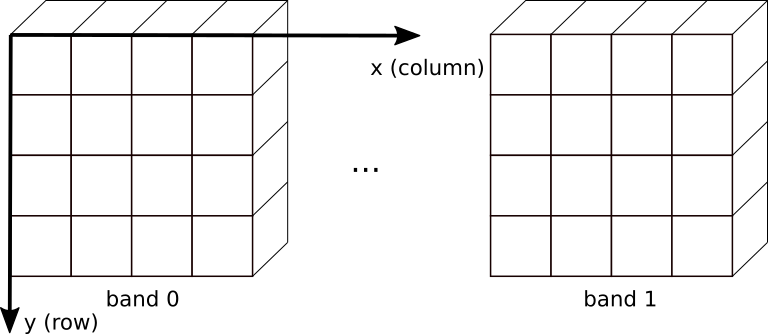

In [25]:
Image("../images/multiband.png" , width = 500, height = 500)

In [ ]:
jim.geometry.cropBand(0)
jim.properties.nrOfBand()

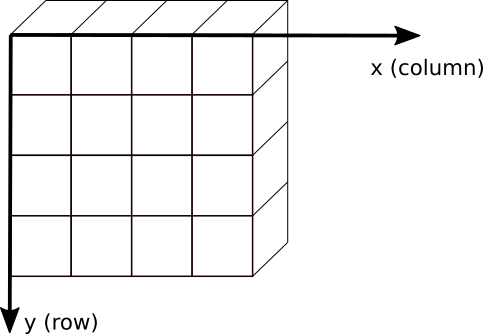

In [26]:
Image("../images/singleband.png" , width = 500, height = 500)

jim is changed in-place

In [ ]:
jim.np(band = 0)

In [ ]:
jim.geometry.cropBand(0)

In [ ]:
jim.properties.nrOfBand()

jim has been changed inplace

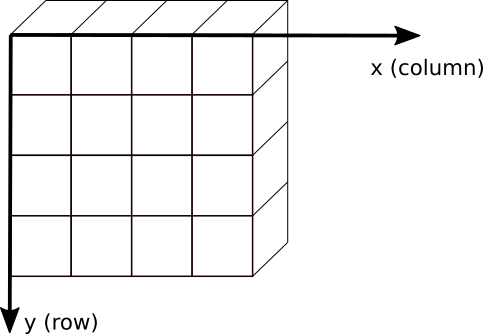

In [27]:
Image("../images/singleband.png" , width = 500, height = 500)

### Processing Jim images with built in functions

In [ ]:
jim = pj.Jim('../data/modis_ndvi_2010.tif', band2plane = True)

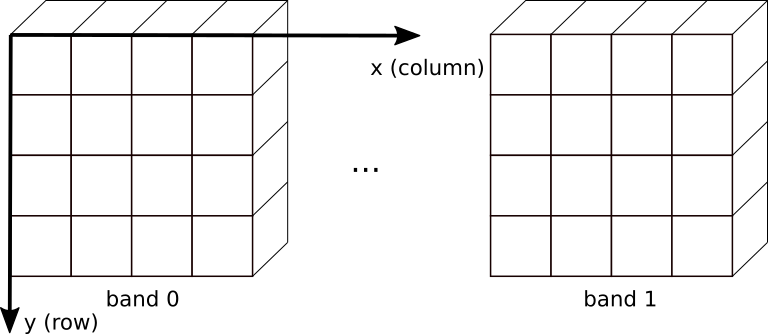

In [28]:
Image("../images/multiband.png" , width = 500, height = 500)

In [ ]:
jim.geometry.reducePlane('median')

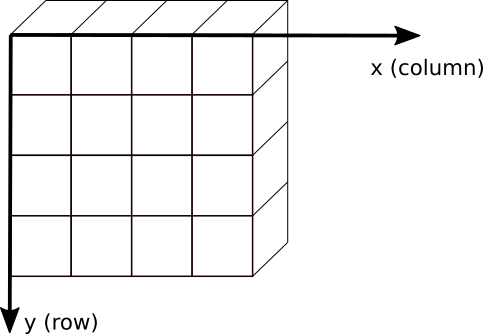

In [29]:
Image("../images/singleband.png" , width = 500, height = 500)

### Processing Jim images with third party libraries

In [ ]:
from scipy import ndimage
jim.np()[:] = ndimage.gaussian_filter(jim.np(), 2)

In [ ]:
jim = pj.Jim('../data/modis_ndvi_2010.tif', band2plane = True)

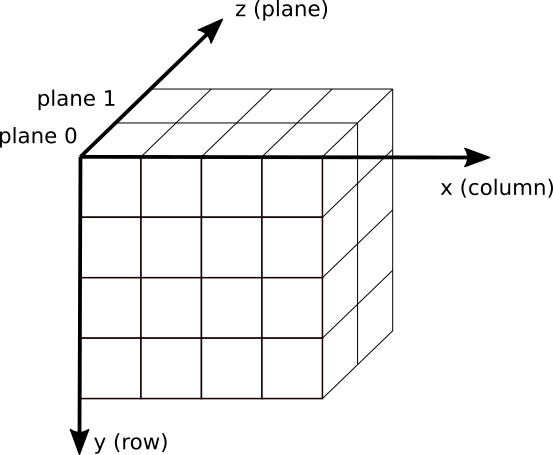

In [30]:
Image("../images/multiplane.png" , width = 500, height = 500)

In [ ]:
jim.xr()

### Naming dimensions manually

In [ ]:
jim.properties.setDimension({'plane': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 'band' : ['NDVI']})

Naming dimensions is particularly useful when converting Jim objects to xarray Datasets

In [ ]:
jim.xr()

We can use the great plot capabilities of xarray

In [ ]:
jim.xr().NDVI.plot(col = 'time')

We can use the geometry function `cropPlane` using either indices or named dimensions (e.g, 'Jul')

In [ ]:
july = pj.geometry.cropPlane(jim, 'Jul')